In [1]:
import numpy as np
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import time
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, StratifiedKFold, StratifiedShuffleSplit, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, precision_recall_curve

In [2]:

train_data = pd.read_csv('FinalTrain.csv')
test_data = pd.read_csv('FinalTest.csv')

In [3]:
train_data.head()

,Amount,PricingStrategy,No. Customers per Acc,ExtraCharges,Days_to_Nearest_Holiday,Prev_Amt,Time_since_last_trans,Avg_amt_per_ProviderId_in_last_12hhrs,sum_of_amt_per_ProviderId_in_last_12hhrs,max_amt_per_ProviderId_in_last_12hhrs,...,Form_Debit,Suspicious_Suspicious,Suspicious_Very Suspicious,Multiple_Sub_by_Customer_Yes,Multiple_Sub_by_Acc_Yes,Week_first_week,Week_fourth_week,Week_second_week,Week_third_week,FraudResult
0,1000.0,3,66,0.0,40,1000.0,2.200000,1000.0,1000.0,1000.0,...,1,0,0,1,0,0,0,0,1,0
1,-20.0,3,30893,0.0,40,1000.0,0.316667,-20.0,-20.0,-20.0,...,0,0,0,1,1,0,0,0,1,0
2,500.0,3,2,0.0,40,1000.0,2.200000,500.0,500.0,500.0,...,1,0,0,0,0,0,0,0,1,0
3,20000.0,3,26,1800.0,40,1000.0,2.200000,20000.0,20000.0,20000.0,...,1,0,0,1,0,0,0,0,1,0
4,-644.0,3,30893,0.0,40,20000.0,1.433333,-644.0,-644.0,-644.0,...,0,0,0,1,1,0,0,0,1,0


In [4]:
X, y = train_data.drop('FraudResult', axis=1), train_data['FraudResult']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

In [5]:
X_test.head()

,Amount,PricingStrategy,No. Customers per Acc,ExtraCharges,Days_to_Nearest_Holiday,Prev_Amt,Time_since_last_trans,Avg_amt_per_ProviderId_in_last_12hhrs,sum_of_amt_per_ProviderId_in_last_12hhrs,max_amt_per_ProviderId_in_last_12hhrs,...,Holiday_Yes,Form_Debit,Suspicious_Suspicious,Suspicious_Very Suspicious,Multiple_Sub_by_Customer_Yes,Multiple_Sub_by_Acc_Yes,Week_first_week,Week_fourth_week,Week_second_week,Week_third_week
13447,-70.0,3,30893,0.0,23,3500.0,0.333333,-232.500000,-930.0,-18.0,...,0,0,0,0,1,1,1,0,0,0
26074,-75.0,3,30893,0.0,11,1500.0,0.416667,-76.071429,-1065.0,-20.0,...,0,0,0,0,1,1,0,0,1,0
65964,2000.0,3,359,0.0,6,1500.0,12.966667,2014.285714,14100.0,5000.0,...,0,1,0,0,1,0,0,0,0,1
89786,10000.0,3,3,0.0,8,1000.0,2.200000,10000.000000,10000.0,10000.0,...,0,1,0,0,1,0,0,0,1,0
16997,20000.0,3,66,1800.0,21,-100.0,173.900000,12500.000000,25000.0,20000.0,...,0,1,0,0,1,0,1,0,0,0


In [6]:
from sklearn.utils import resample

In [7]:
from sklearn.model_selection import TimeSeriesSplit

cv = StratifiedKFold(n_splits=5, random_state=42)
tss = TimeSeriesSplit(n_splits=5)

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
import lightgbm as lgb
import catboost as cat
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

In [9]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif
from sklearn.feature_selection import RFE

In [10]:
from sklearn.feature_selection import SelectFromModel

<h2>XGBOOST</h2>

In [13]:
xgbm = xgb.XGBClassifier(n_jobs=-1, scale_pos_weight=496, random_state=42, learning_rate=0.1, subsample=0.8)
xgbm.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=-1, nthread=None,
       objective='binary:logistic', random_state=42, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=496, seed=None, silent=None,
       subsample=0.8, verbosity=1)

In [14]:
cross_val_score(xgbm, X_train, y_train, cv=cv, scoring='f1', n_jobs=-1).mean()

0.7807616266632715

In [14]:
fts = pd.DataFrame({'Feats.' : X_train.columns, 'Importances' : xgbm.feature_importances_}).sort_values(by='Importances', ascending=False)
fts.head()

,Feats.,Importances
8,sum_of_amt_per_ProviderId_in_last_12hhrs,0.361039
116,Amount_to_mean_ChannelId,0.123299
79,Avg_amt_per_PricingStrategy_in_last_72hhrs,0.103940
9,max_amt_per_ProviderId_in_last_12hhrs,0.067506
31,Avg_amt_per_ProductCategory_in_last_72hhrs,0.051372


In [16]:
fts = fts[fts['Importances']>0]
fts.shape

(91, 2)

In [11]:
from numpy import sort

In [19]:
sorted([2, 1,5], reverse=True)[:2]

[5, 2]

In [20]:
thresholds = sort(np.array(fts['Importances']))
for thresh in thresholds:
    
    f1 = []
    
    for train, test in StratifiedKFold(n_splits=3, random_state=42).split(X_train, y_train):
        # select features using threshold
        selection = SelectFromModel(xgbm, threshold=thresh, prefit=True)
        select_X_train = selection.transform(X_train.iloc[train])
        # train model
        selection_model = xgb.XGBClassifier(n_jobs=-1, scale_pos_weight=496, random_state=42, subsample=0.8)
        selection_model.fit(select_X_train, y_train.iloc[train])
        # eval model
        select_X_test = selection.transform(X_train.iloc[test])
        y_pred = selection_model.predict(select_X_test)
        
        f1.append(f1_score(y_train.iloc[test], y_pred))
    
    print("Thresh=%.8f, n=%d, F1: %.8f%%" % (thresh, select_X_train.shape[1], np.mean(f1)))
        
    

Thresh=0.00000763, n=91, F1: 0.79550792%
Thresh=0.00001429, n=90, F1: 0.80442433%
Thresh=0.00002143, n=89, F1: 0.79539618%
Thresh=0.00002579, n=88, F1: 0.79539618%
Thresh=0.00003384, n=87, F1: 0.79764595%
Thresh=0.00003682, n=86, F1: 0.79986721%
Thresh=0.00008334, n=85, F1: 0.80219566%
Thresh=0.00008513, n=84, F1: 0.80444543%
Thresh=0.00009011, n=83, F1: 0.80222417%
Thresh=0.00009661, n=82, F1: 0.80222417%
Thresh=0.00012052, n=81, F1: 0.80457300%
Thresh=0.00013186, n=80, F1: 0.80457300%
Thresh=0.00014688, n=79, F1: 0.80457300%
Thresh=0.00016920, n=78, F1: 0.80457300%
Thresh=0.00017663, n=77, F1: 0.80457300%
Thresh=0.00017924, n=76, F1: 0.79991550%
Thresh=0.00021638, n=75, F1: 0.80213675%
Thresh=0.00022360, n=74, F1: 0.80457300%
Thresh=0.00022542, n=73, F1: 0.80444543%
Thresh=0.00025012, n=72, F1: 0.79991550%
Thresh=0.00026402, n=71, F1: 0.79539618%
Thresh=0.00029990, n=70, F1: 0.80002849%
Thresh=0.00030203, n=69, F1: 0.79108310%
Thresh=0.00031528, n=68, F1: 0.79993353%
Thresh=0.0003157

In [40]:
fts[fts['Importances']>=0.0017796].shape

(35, 2)

In [43]:
features = fts[fts['Importances']>=0.0017796]['Feats.']
features.values

array(['sum_of_amt_per_ProviderId_in_last_12hhrs',
       'Amount_to_mean_ChannelId',
       'Avg_amt_per_PricingStrategy_in_last_72hhrs',
       'max_amt_per_ProviderId_in_last_12hhrs',
       'Avg_amt_per_ProductCategory_in_last_72hhrs',
       'max_amt_per_ProductCategory_in_last_72hhrs',
       'Avg_amt_per_CustomerId_in_last_72hhrs',
       'max_amt_per_PricingStrategy_in_last_72hhrs',
       'max_amt_per_ProductId_in_last_12hhrs',
       'Avg_amt_per_PricingStrategy_in_last_168hhrs',
       'sum_of_amt_per_ProductCategory_in_last_72hhrs',
       'Week_fourth_week', 'Time_since_last_trans',
       'Amount_to_std_CustomerId',
       'sum_of_amt_per_PricingStrategy_in_last_72hhrs',
       'sum_of_amt_per_ChannelId_in_last_72hhrs', 'Prev_Amt',
       'no_of_trans_per_PricingStrategy_in_last_24hhrs', 'Month_January',
       'Amount_to_mean_PricingStrategy',
       'max_amt_per_ChannelId_in_last_72hhrs', 'Days_to_Nearest_Holiday',
       'Weekday_Wednesday', 'Avg_amt_per_ProviderId_in_

In [11]:
xgbm_fts = ['sum_of_amt_per_ProviderId_in_last_12hhrs',
       'Amount_to_mean_ChannelId',
       'Avg_amt_per_PricingStrategy_in_last_72hhrs',
       'max_amt_per_ProviderId_in_last_12hhrs',
       'Avg_amt_per_ProductCategory_in_last_72hhrs',
       'max_amt_per_ProductCategory_in_last_72hhrs',
       'Avg_amt_per_CustomerId_in_last_72hhrs',
       'max_amt_per_PricingStrategy_in_last_72hhrs',
       'max_amt_per_ProductId_in_last_12hhrs',
       'Avg_amt_per_PricingStrategy_in_last_168hhrs',
       'sum_of_amt_per_ProductCategory_in_last_72hhrs',
       'Week_fourth_week', 'Time_since_last_trans',
       'Amount_to_std_CustomerId',
       'sum_of_amt_per_PricingStrategy_in_last_72hhrs',
       'sum_of_amt_per_ChannelId_in_last_72hhrs', 'Prev_Amt',
       'no_of_trans_per_PricingStrategy_in_last_24hhrs', 'Month_January',
       'Amount_to_mean_PricingStrategy',
       'max_amt_per_ChannelId_in_last_72hhrs', 'Days_to_Nearest_Holiday',
       'Weekday_Wednesday', 'Avg_amt_per_ProviderId_in_last_24hhrs',
       'max_amt_per_ChannelId_in_last_168hhrs',
       'Avg_amt_per_ChannelId_in_last_72hhrs', 'Week_first_week',
       'No. Customers per Acc', 'max_amt_per_CustomerId_in_last_24hhrs',
       'Avg_amt_per_ProviderId_in_last_12hhrs', 'ProductId_ProductId_7',
       'Avg_amt_per_CustomerId_in_last_12hhrs',
       'Amount_to_std_PricingStrategy', 'ProductId_ProductId_20',
       'ProviderId_ProviderId_6']

In [12]:
X_train_xgbm = X_train.loc[:, xgbm_fts]
X_test_xgbm = X_test.loc[:, xgbm_fts]

In [13]:
model = xgb.XGBClassifier(
    max_depth=3, min_child_weight=1, gamma = 0, subsample=0.8, colsample_bytree=1,
    scale_pos_weight = 496, nthread=-1
)
model.fit(X_train_xgbm, y_train)

train_predictions = model.predict(X_train_xgbm)
test_predictions = model.predict(X_test_xgbm)

print('Train Score: {:4f}'.format(f1_score(y_train, train_predictions)))
print('Test Score: {:4f}'.format(f1_score(y_test, test_predictions)))

Train Score: 0.821333
Test Score: 0.730769


In [47]:
cross_val_score(model, X_train_xgbm, y_train, scoring='f1', cv=cv, n_jobs=-1).mean()

0.7959487677134737

In [18]:
params_1 = {
    'max_depth' : [6, 7, 8],
    'min_child_weight' : [2, 3, 4]
}

grid = GridSearchCV(
    xgb.XGBClassifier(
    max_depth=3, min_child_weight=1, gamma = 0, subsample=0.8, colsample_bytree=1,
    scale_pos_weight = 496, nthread=-1
), params_1, scoring='f1', n_jobs=-1, refit=True, verbose=0, cv=cv
)

grid.fit(X_train_xgbm, y_train)

#grid.grid_scores_

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=False),
       error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=-1, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=496,
       seed=None, silent=None, subsample=0.8, verbosity=1),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [6, 7, 8], 'min_child_weight': [2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [19]:
print(grid.best_params_, grid.best_score_)

{'max_depth': 6, 'min_child_weight': 2} 0.8571558300954042


In [20]:
params_2 = {
    'gamma' : [i/10.0 for i in range(0, 5)]
}

grid2 = GridSearchCV(
    xgb.XGBClassifier(
    max_depth=6, min_child_weight=2, gamma = 0, subsample=0.8, colsample_bytree=1,
    scale_pos_weight = 496, nthread=-1
), params_2, scoring='f1', n_jobs=-1, refit=True, verbose=0, cv=cv
)

grid2.fit(X_train_xgbm, y_train)

#grid.grid_scores_

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=False),
       error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=6, min_child_weight=2, missing=None,
       n_estimators=100, n_jobs=1, nthread=-1, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=496,
       seed=None, silent=None, subsample=0.8, verbosity=1),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'gamma': [0.0, 0.1, 0.2, 0.3, 0.4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [21]:
print(grid2.best_params_, grid2.best_score_)

{'gamma': 0.0} 0.8571558300954042


In [22]:
params_3 = {
    'subsample' : [i/10.0 for i in range(6, 10)],
    'colsample_bytree' : [i/10.0 for i in range(6, 10)]
}

grid3 = GridSearchCV(
    xgb.XGBClassifier(
    max_depth=6, min_child_weight=2, gamma = 0, subsample=0.8, colsample_bytree=1,
    scale_pos_weight = 496, nthread=-1
), params_3, scoring='f1', n_jobs=-1, refit=True, verbose=0, cv=cv
)

grid3.fit(X_train_xgbm, y_train)

#grid.grid_scores_

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=False),
       error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=6, min_child_weight=2, missing=None,
       n_estimators=100, n_jobs=1, nthread=-1, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=496,
       seed=None, silent=None, subsample=0.8, verbosity=1),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'subsample': [0.6, 0.7, 0.8, 0.9], 'colsample_bytree': [0.6, 0.7, 0.8, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [23]:
print(grid3.best_params_, grid3.best_score_)

{'colsample_bytree': 0.6, 'subsample': 0.9} 0.8761863201741673


In [24]:
params_4 = {
    'subsample' : [0.8, 0.85, 0.9, 0.95],
    'colsample_bytree' : [0.5, 0.55, 0.6, 0.65, 0.7]
}

grid4 = GridSearchCV(
    xgb.XGBClassifier(
    max_depth=6, min_child_weight=2, gamma = 0, subsample=0.8, colsample_bytree=1,
    scale_pos_weight = 496, nthread=-1
), params_4, scoring='f1', n_jobs=-1, refit=True, verbose=0, cv=cv
)

grid4.fit(X_train_xgbm, y_train)

#grid.grid_scores_

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=False),
       error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=6, min_child_weight=2, missing=None,
       n_estimators=100, n_jobs=1, nthread=-1, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=496,
       seed=None, silent=None, subsample=0.8, verbosity=1),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'subsample': [0.8, 0.85, 0.9, 0.95], 'colsample_bytree': [0.5, 0.55, 0.6, 0.65, 0.7]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [26]:
print(grid4.best_params_, grid4.best_score_)

{'colsample_bytree': 0.7, 'subsample': 0.95} 0.881389600345198


In [32]:
params_5 = {
    'subsample' : [0.88, 0.9, 0.95, 0.97],
    'colsample_bytree' : [0.66, 0.68, 0.7, 0.72, 0.75, 0.78, 0.8]
}

grid5 = GridSearchCV(
    xgb.XGBClassifier(
    max_depth=6, min_child_weight=2, gamma = 0, subsample=0.8, colsample_bytree=1,
    scale_pos_weight = 496, nthread=-1
), params_5, scoring='f1', n_jobs=-1, refit=True, verbose=0, cv=cv
)

grid5.fit(X_train_xgbm, y_train)

#grid.grid_scores_

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=False),
       error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=6, min_child_weight=2, missing=None,
       n_estimators=100, n_jobs=1, nthread=-1, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=496,
       seed=None, silent=None, subsample=0.8, verbosity=1),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'subsample': [0.88, 0.9, 0.95, 0.97], 'colsample_bytree': [0.66, 0.68, 0.7, 0.72, 0.75, 0.78, 0.8]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [33]:
print(grid5.best_params_, grid5.best_score_)

{'colsample_bytree': 0.72, 'subsample': 0.97} 0.8852582668357044


In [37]:
f1_score(y_train, grid5.predict(X_train_xgbm))

0.9565217391304348

In [38]:
f1_score(y_test, grid5.predict(X_test_xgbm))

0.8470588235294118

In [34]:
params_6 = {
    'reg_lambda' : [0.01, 0.05, 0.1, 0.5, 1],
    'reg_alpha':[0, 0.001, 0.005, 0.01, 0.05]
}

grid6 = GridSearchCV(
    xgb.XGBClassifier(
    max_depth=6, min_child_weight=2, gamma = 0, subsample=0.97, colsample_bytree=0.72,
    scale_pos_weight = 496, nthread=-1
), params_6, scoring='f1', n_jobs=-1, refit=True, verbose=0, cv=cv
)

grid6.fit(X_train_xgbm, y_train)

#grid.grid_scores_

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=False),
       error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.72, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=6,
       min_child_weight=2, missing=None, n_estimators=100, n_jobs=1,
       nthread=-1, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=496, seed=None,
       silent=None, subsample=0.97, verbosity=1),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'reg_lambda': [0.01, 0.05, 0.1, 0.5, 1], 'reg_alpha': [0, 0.001, 0.005, 0.01, 0.05]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [39]:
print(grid6.best_params_, grid6.best_score_)

{'reg_alpha': 0, 'reg_lambda': 1} 0.8852582668357044


In [41]:
f1_score(y_train, grid6.predict(X_train_xgbm))

0.9565217391304348

In [42]:
f1_score(y_test, grid6.predict(X_test_xgbm))

0.8470588235294118

In [43]:
params_7 = {
    'reg_lambda' : [1, 1.3, 1.7, 2.0, 2.5],
    'reg_alpha':[0.0001, 0.0002, 0.00035, 0.00045]
}

grid7 = GridSearchCV(
    xgb.XGBClassifier(
    max_depth=6, min_child_weight=2, gamma = 0, subsample=0.97, colsample_bytree=0.72,
    scale_pos_weight = 496, nthread=-1
), params_7, scoring='f1', n_jobs=-1, refit=True, verbose=0, cv=cv
)

grid7.fit(X_train_xgbm, y_train)

#grid.grid_scores_

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=False),
       error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.72, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=6,
       min_child_weight=2, missing=None, n_estimators=100, n_jobs=1,
       nthread=-1, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=496, seed=None,
       silent=None, subsample=0.97, verbosity=1),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'reg_lambda': [1, 1.3, 1.7, 2.0, 2.5], 'reg_alpha': [0.0001, 0.0002, 0.00035, 0.00045]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [44]:
print(grid7.best_params_, grid7.best_score_)

{'reg_alpha': 0.0001, 'reg_lambda': 1} 0.8852582668357044


In [46]:
params_8 = {
    'n_estimators' : [2500, 4000, 7000, 12000]
}

grid8 = GridSearchCV(
    xgb.XGBClassifier(
    max_depth=6, min_child_weight=2, gamma = 0, subsample=0.97, colsample_bytree=0.72,
    scale_pos_weight = 496, nthread=-1
), params_8, scoring='f1', n_jobs=-1, refit=True, verbose=0, cv=cv
)

grid8.fit(X_train_xgbm, y_train)

#grid.grid_scores_

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=False),
       error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.72, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=6,
       min_child_weight=2, missing=None, n_estimators=100, n_jobs=1,
       nthread=-1, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=496, seed=None,
       silent=None, subsample=0.97, verbosity=1),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [2500, 4000, 7000, 12000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [47]:
print(grid8.best_params_, grid8.best_score_)

{'n_estimators': 7000} 0.8791245373804117


In [13]:
xgbc = xgb.XGBClassifier(
    n_estimators=10000, learning_rate=0.008, max_depth=6, min_child_weight=2, 
    gamma = 0, subsample=0.97, colsample_bytree=0.72,
    scale_pos_weight = 496, nthread=-1, random_state=42
)

In [51]:
xgbc.fit(X_train_xgbm, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.72, gamma=0,
       learning_rate=0.008, max_delta_step=0, max_depth=6,
       min_child_weight=2, missing=None, n_estimators=10000, n_jobs=1,
       nthread=-1, objective='binary:logistic', random_state=42,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=496, seed=None,
       silent=None, subsample=0.97, verbosity=1)

In [52]:

train_predictions = xgbc.predict(X_train_xgbm)
test_predictions = xgbc.predict(X_test_xgbm)

print('Train Score: {:4f}'.format(f1_score(y_train, train_predictions)))
print('Test Score: {:4f}'.format(f1_score(y_test, test_predictions)))

Train Score: 1.000000
Test Score: 0.900000


In [53]:
cross_val_score(xgbc, X_train_xgbm, y_train, scoring='f1', cv=cv, n_jobs=-1, verbose=0).mean()

0.8677991217524879

In [55]:
Counter(test_predictions)

Counter({0: 19092, 1: 41})

In [81]:

p_sl = xgbc.predict_proba(X_test_xgbm)
pred = [1 if y>=0.5 else 0 for y in p_sl[:, 1]]

print("f1 score: {:.3f}".format(f1_score(y_test, pred)))

f1 score: 0.900


In [82]:
precision_score(y_test, pred)

0.8780487804878049

In [83]:
recall_score(y_test, pred)

0.9230769230769231

In [66]:
Counter(pred)

Counter({0: 19092, 1: 41})

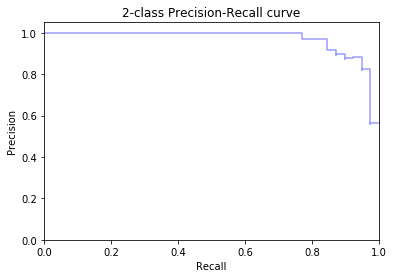

In [67]:
precision, recall, thresholds = precision_recall_curve(y_test, p_sl[:,1])

thresholds = np.append(thresholds, 1)
f1_scores = 2*(precision*recall)/(precision+recall)
plt.step(recall, precision, color='b', alpha=0.4, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve')
plt.show()

Threshold cutoff:  0.4914172291755676
Max F1-score at cut-off :  0.9135802469135802


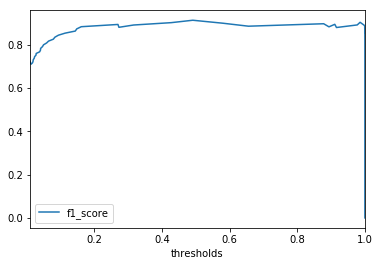

In [68]:
scrs = pd.DataFrame({'precision' : precision, 'recal' : recall, 'thresholds' : thresholds, 'f1_score':f1_scores})
print("Threshold cutoff: ",scrs.loc[scrs['f1_score'] == scrs.f1_score.max(),'thresholds'].iloc[0])
print("Max F1-score at cut-off : ",scrs.f1_score.max())

thresh = scrs.loc[scrs['f1_score'] == scrs.f1_score.max(),'thresholds'].iloc[0]

scrs.plot(x='thresholds', y='f1_score')

In [69]:
scrs.loc[scrs['f1_score'] == scrs.f1_score.max()]

,precision,recal,thresholds,f1_score
27,0.880952,0.948718,0.491417,0.91358


In [70]:
frame = scrs.loc[scrs['precision'] == scrs['recal']]

In [71]:
frame

,precision,recal,thresholds,f1_score
30,0.897436,0.897436,0.878227,0.897436


In [89]:
thresh = 0.491417

In [90]:
pred = [1 if y>=thresh else 0 for y in p_sl[:, 1]]

f1_score(y_test, pred)

0.9135802469135802

In [91]:
precision_score(y_test, pred)

0.8809523809523809

In [92]:
recall_score(y_test, pred)

0.9487179487179487

In [93]:
Counter(pred)

Counter({0: 19091, 1: 42})

In [12]:
from sklearn.utils import class_weight

In [13]:
import mlxtend
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.pipeline import Pipeline

<h3>LIGHTGBM</h3>

In [16]:
lgbm = lgb.LGBMClassifier(
    n_estimators=100, learning_rate=0.085, max_depth=5, num_leaves=25, class_weight='balanced',
    subsample=0.8, colsample_bytree=0.8, subsample_for_bin=200000, random_state=42, n_jobs=-1
)

sfs1 = SFS(estimator=lgbm, 
           k_features='best',
           forward=True, 
           floating=False, 
           scoring='f1',
           n_jobs=-1,
           cv=5)

pipe = Pipeline([('sfs', sfs1), 
                 ('lgbm', lgbm)])

param_grid = [
  {'lgbm__max_depth': [3, 4, 5, 6, 7],
   'lgbm__num_leaves': [10, 15, 20, 25, 30],
   'lgbm__subsample' : [0.7, 0.8, 0.9]
  }
  ]

fit_params = {
    'early_stopping_rounds' : 42,
    'eval_metric' : 'f1',
    'eval_set' : [(X_test, y_test)]
}


gs = RandomizedSearchCV(estimator=pipe, 
                  param_distributions=param_grid,
                  scoring='f1',
                  n_iter=50,
                  n_jobs=-1, 
                  cv=tss,
                  iid=True,
                  refit=True)



In [17]:
# run gridearch
gs = gs.fit(X_train, y_train, **fit_params)

AttributeError: 'list' object has no attribute 'values'